# Import Libary

In [9]:
import pandas as pd
import numpy as np
import sklearn
import yellowbrick

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Mengambil Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jhnwlkn/Machine-Leaning/main/customer_support_data.csv")
df

<ipython-input-2-2bfb8af74319>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/jhnwlkn/Machine-Leaning/main/customer_support_data.csv")
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,1/8/2023 11:13,1/8/2023 11:47,1-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,1/8/2023 12:52,1/8/2023 12:54,1-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,1/8/2023 20:16,1/8/2023 20:38,1-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,1/8/2023 20:56,1/8/2023 21:16,1-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,1/8/2023 10:30,1/8/2023 10:32,1-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                10527 non-null  object 
 1   channel_name             10527 non-null  object 
 2   category                 10527 non-null  object 
 3   Sub-category             10527 non-null  object 
 4   Customer Remarks         3423 non-null   object 
 5   Order_id                 6030 non-null   object 
 6   order_date_time          1698 non-null   object 
 7   Issue_reported at        10527 non-null  object 
 8   issue_responded          10527 non-null  object 
 9   Survey_response_Date     10527 non-null  object 
 10  Customer_City            1684 non-null   object 
 11  Product_category         1696 non-null   object 
 12  Item_price               1698 non-null   float64
 13  connected_handling_time  10 non-null     float64
 14  Agent_name            

In [4]:
df.isna().sum()

Unique id                  75380
channel_name               75380
category                   75380
Sub-category               75380
Customer Remarks           82484
Order_id                   79877
order_date_time            84209
Issue_reported at          75380
issue_responded            75380
Survey_response_Date       75380
Customer_City              84223
Product_category           84211
Item_price                 84209
connected_handling_time    85897
Agent_name                 75380
Supervisor                 75380
Manager                    75380
Tenure Bucket              75380
Agent Shift                75380
CSAT Score                 75380
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_price,1698.0,6516.472909,13201.741722,9.0,426.50,999.0,4419.00,134999.0
connected_handling_time,10.0,298.100000,173.490602,0.0,205.25,271.5,403.25,574.0
CSAT Score,10527.0,4.207372,1.416707,1.0,4.00,5.0,5.00,5.0


# Prrcessing Data

In [10]:
df['Item_price'].fillna(value=df['Item_price'].mean(), inplace=True)
df['connected_handling_time'].fillna(value=df['connected_handling_time'].mean(), inplace=True)
df['CSAT Score'].fillna(value=df['CSAT Score'].mean(), inplace=True)

In [11]:
df_clean = df.drop(['Unique id', 'channel_name','category','Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at','issue_responded','Survey_response_Date', 'Customer_City','Product_category', 'Agent_name'\
                    ,'Supervisor', 'Manager','Tenure Bucket','Agent Shift'], axis=1)
df_clean

,Item_price,connected_handling_time,CSAT Score
0,6516.472909,298.1,5.000000
1,6516.472909,298.1,5.000000
2,6516.472909,298.1,5.000000
3,6516.472909,298.1,5.000000
4,6516.472909,298.1,5.000000
...,...,...,...
85902,6516.472909,298.1,4.207372
85903,6516.472909,298.1,4.207372
85904,6516.472909,298.1,4.207372
85905,6516.472909,298.1,4.207372


In [9]:
df.isna().sum()

Unique id                  75380
channel_name               75380
category                   75380
Sub-category               75380
Customer Remarks           82484
Order_id                   79877
order_date_time            84209
Issue_reported at          75380
issue_responded            75380
Survey_response_Date       75380
Customer_City              84223
Product_category           84211
Item_price                     0
connected_handling_time        0
Agent_name                 75380
Supervisor                 75380
Manager                    75380
Tenure Bucket              75380
Agent Shift                75380
CSAT Score                 75380
dtype: int64

# Tingkat kebagusannn Data

Alasan saya memakai algoritma k_means adalah karena mudah di pahami algoritmanya dan enteng dibanding agglomorative dan dbscan

In [13]:
kmeans_model = KMeans(n_clusters=3, n_init=1, random_state=100).fit(df_clean)

In [15]:
x_array = np.array(df_clean)
scaler = MinMaxScaler()
x_scales = scaler.fit_transform(x_array)

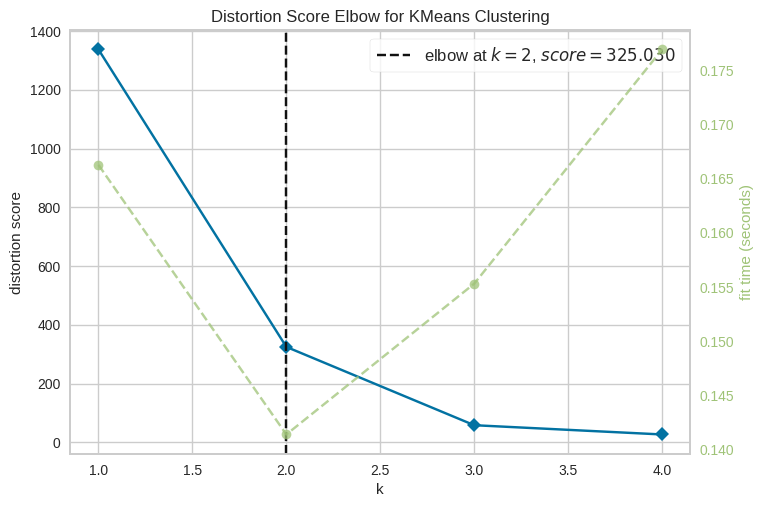

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
km = KMeans(n_init=1, random_state=100)
visualizer = KElbowVisualizer(km, k=(1,5),timings=True)
visualizer.fit(x_scales)
visualizer.show()

In [17]:
Z = df_clean.copy()

berarti data akurasi tingkat ketepatan data yang digunakan hampir mendekati satu yang berarti tidak ada sama sekali anomali dan range score silhoutte berkisar antara -0.5 < x  < 1

In [19]:
ss = silhouette_score(Z, kmeans_model.labels_)
print(f"Akurasi berdasarkan silhoutte score adalah : {ss} ")

Akurasi berdasarkan silhoutte score adalah : 0.9922335821097018 
